In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tips_data = sns.load_dataset("tips")

In [4]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips_data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
X, y = tips_data.drop(["tip", "smoker", "day", "time"], axis="columns"), tips_data["tip"]
X

,total_bill,sex,size
0,16.99,Female,2
1,10.34,Male,3
2,21.01,Male,3
3,23.68,Male,2
4,24.59,Female,4
...,...,...,...
239,29.03,Male,3
240,27.18,Female,2
241,22.67,Male,2
242,17.82,Male,2



Column: total_bill


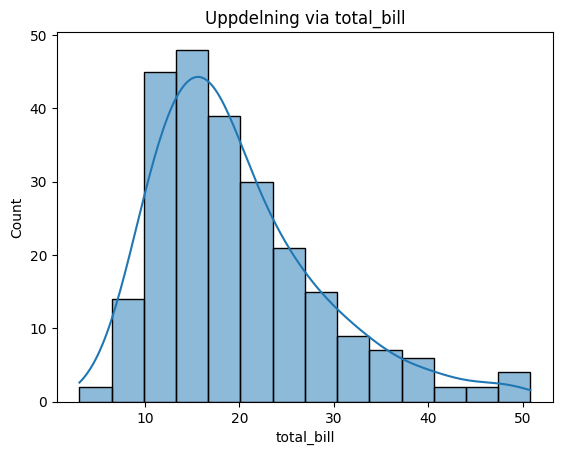


Column: sex


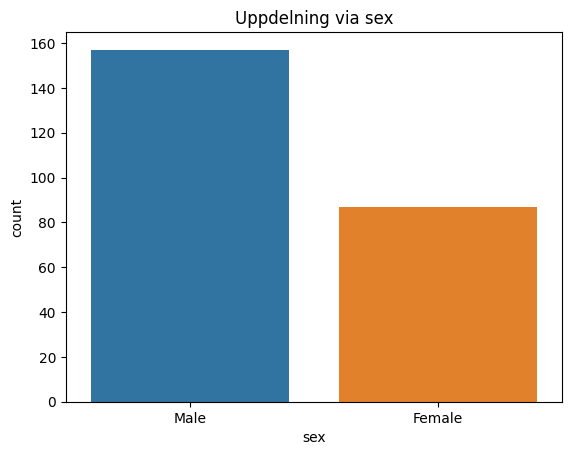


Column: size


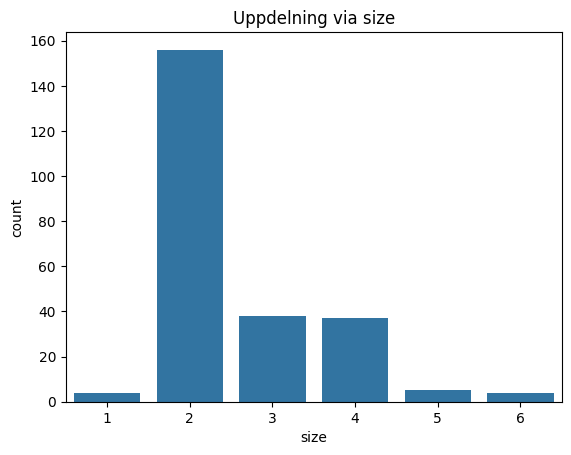

In [9]:
columns_of_interest = ["total_bill", "sex", "size"]

for column in columns_of_interest:
    print(f"\nColumn: {column}")
    if column == "sex":
        sns.countplot(data=tips_data, x=column, hue="sex")
    elif column == "size":
        sns.countplot(data=tips_data, x=column)
    else:
        sns.histplot(data=tips_data, x=column, kde=True)
    plt.title(f'Uppdelning via {column}')
    plt.xlabel(column)
    plt.show()


c) Additional plots for investigation:


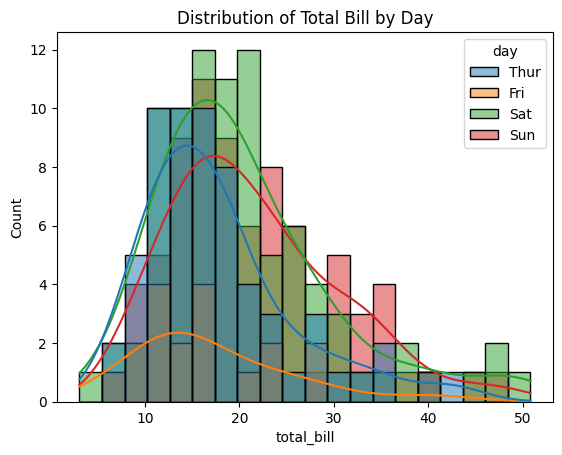

In [10]:
# c) Additional plots for investigation
print("\nc) Additional plots for investigation:")
# For example, let's visualize the distribution of total_bill and tip amount by day
sns.histplot(data=tips_data, x='total_bill', hue='day', kde=True, bins=20)
plt.title('Distribution of Total Bill by Day')
plt.show()


### Train|Test split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# check that it adds up to 200
print(f"{X_train.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (170, 3)
y_train.shape = (170,)
X_test.shape = (74, 3)
y_test.shape = (74,)


In [12]:
X.head(10)

,total_bill,sex,size
0,16.99,Female,2
1,10.34,Male,3
2,21.01,Male,3
3,23.68,Male,2
4,24.59,Female,4
5,25.29,Male,4
6,8.77,Male,2
7,26.88,Male,4
8,15.04,Male,2
9,14.78,Male,2


### Feature standardization

In [13]:

def standardize_features(X_train, X_test):
    # Compute mean and standard deviation from training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Standardize training data
    X_train_scaled = (X_train - mean) / std
    
    # Standardize testing data using mean and standard deviation from training data
    X_test_scaled = (X_test - mean) / std
    
    return X_train_scaled, X_test_scaled

# Example usage
X_train = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
X_test = np.array([[10, 11, 12],
                   [13, 14, 15]])

X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)

print("X_train_scaled:")
print(X_train_scaled)
print("\nX_test_scaled:")
print(X_test_scaled)


X_train_scaled:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

X_test_scaled:
[[2.44948974 2.44948974 2.44948974]
 [3.67423461 3.67423461 3.67423461]]


### Polynominal features

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

# Instantiate PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Fit and transform the data
X_poly_fit_transform = poly.fit_transform(X)

# Transform the data without fitting again
X_poly_transform = poly.transform(X)

# Compare the transformed features
comparison = X_poly_fit_transform == X_poly_transform

# Sum up the comparison
sum_comparison = comparison.sum()

# Check if the sum equals the length
are_same = sum_comparison == len(X_poly_fit_transform)

print("Are the transformed features the same?", are_same)


Are the transformed features the same? False


### Polynominal regression

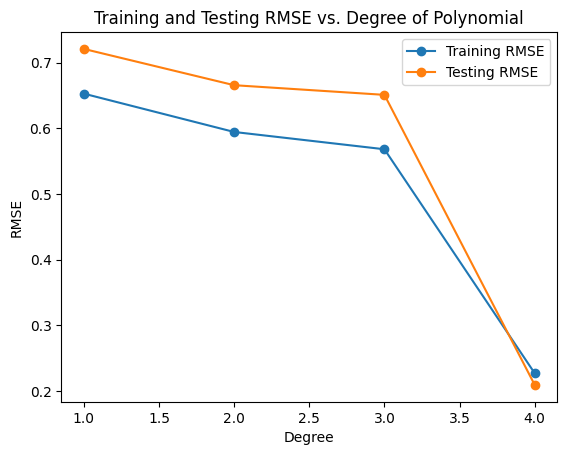

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).reshape(-1, 1) + np.random.normal(scale=0.1, size=(100, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through degrees 1 to 4
degrees = range(1, 5)
train_errors = []
test_errors = []

for degree in degrees:
    # Instantiate PolynomialFeatures with the current degree
    poly = PolynomialFeatures(degree=degree)
    
    # Fit and transform X_train
    X_train_poly = poly.fit_transform(X_train)
    
    # Transform X_test
    X_test_poly = poly.transform(X_test)
    
    # Perform linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate RMSE for training and testing
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the results
plt.plot(degrees, train_errors, label='Training RMSE', marker='o')
plt.plot(degrees, test_errors, label='Testing RMSE', marker='o')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('Training and Testing RMSE vs. Degree of Polynomial')
plt.legend()
plt.show()


### Regularization methods

In [34]:
model_polynomial = PolynomialFeatures(4, include_bias=False)
poly_features = model_polynomial.fit_transform(X)
poly_features.shape

(100, 4)

In [35]:
X_train.shape, X_test.shape

((80, 1), (20, 1))

In [36]:
from sklearn.preprocessing import StandardScaler

# instantitates a scaler instance from the StandaaredScaler class
scaler = StandardScaler()

# gets parameters from X_train and transformes (scale) X_train
scaled_X_train = scaler.fit_transform(X_train)

# use parameters from X_train to scale X_test
# never do fit_transform on X_test (can cause data leakage)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(-3.8857805861880476e-17,
 0.9999999999999998,
 -0.21649606762712043,
 0.9805756751917701)

### Ridge

In [37]:
from sklearn.linear_model import RidgeCV # CV -> cross validation

# cross validation with different alphas and scored with MSE
tips_data_cv = RidgeCV(
    alphas=[.01, .1, 0.5, 1, 5, 10], 
    scoring="neg_mean_squared_error")

tips_data_cv.fit(scaled_X_train, y_train)
tips_data_cv.alpha_

10.0

In [24]:
tips_data_cv.coef_

array([[-0.08283546]])

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = tips_data_cv.predict(scaled_X_test)

RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
MAE = mean_absolute_error(y_pred, y_test)

MAE, RMSE

(0.6314498689981197, 0.7184842220594111)

### Lasso

In [25]:
from sklearn.linear_model import LassoCV

tips_lasso_CV = LassoCV(eps=0.001, n_alphas=100, max_iter=int(1e4), cv=5)
tips_lasso_CV.fit(scaled_X_train, y_train)
tips_lasso_CV.alpha_

c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.31898920141334e-05

In [26]:
tips_lasso_CV.coef_

array([-0.0930967])

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = tips_lasso_CV.predict(scaled_X_test)

RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
MAE = mean_absolute_error(y_pred, y_test)

MAE, RMSE

(0.633182653554409, 0.7207467410763201)

### Elastic

In [30]:
from sklearn.linear_model import ElasticNetCV

tips_elastic = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
    eps=0.001,
    n_alphas=100,
    max_iter=int(1e4),
)

tips_elastic.fit(scaled_X_train, y_train)
tips_elastic.alpha_

c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0009318989201413338

In [31]:
tips_elastic.l1_ratio_

0.1

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = tips_elastic.predict(scaled_X_test)

RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
MAE = mean_absolute_error(y_pred, y_test)

MAE, RMSE

(0.6331694792972767, 0.7207290103017733)